In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from itertools import count
from matplotlib.animation import FuncAnimation
%matplotlib inline 


In [2]:
class LinearRegression:
    def __init__(self,x,y):
        self.x = x 
        self.y = y
        self.w = np.matrix(np.ones(self.x.shape[1]))
        self.b = 1
        self.m = self.x.shape[0]
        # momentum
        self.v_w =  np.matrix(np.zeros(self.x.shape[1]))
        self.v_b = 0
        # RMSProp
        self.s_w = np.matrix(np.zeros(self.x.shape[1]))
        self.s_b = 0
        
    def predict(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def cost(self,hx,y):
        return np.power(np.sum(hx-y),2)/(2*self.m)
    
    def fit(self,iteration,alpha,optimizer=''):
        cost = np.zeros(iteration)
        for i in range(iteration):
            y_pred = self.predict(self.x)
            dw = np.dot((y_pred-self.y).T,self.x)/self.m
            db = np.sum(y_pred-self.y)/self.m
            
            if optimizer == 'momentum':
                self.v_w = 0.9*self.v_w+dw
                dw = self.v_w
                self.v_b = 0.9*self.v_b+db
                db = self.v_b
            
            if optimizer == 'RMSProp':
                self.s_w = 0.999*self.s_w+(1-0.999)*np.power(dw,2)
                dw = ((dw)/np.sqrt(self.s_w)+0.000000001)
                self.s_b = 0.999*self.s_b+(1-0.999)*np.power(db,2)
                db = ((db)/np.sqrt(self.s_b)+0.000000001)


            if optimizer == 'adam' :
                self.v_w = 0.9*self.v_w+dw
                self.v_b = 0.9*self.v_b+db
                self.s_w = 0.999*self.s_w+(1-0.999)*np.power(dw,2)
                self.s_b = 0.999*self.s_b+(1-0.999)*np.power(db,2)
                dw = ((self.v_w)/np.sqrt(self.s_w)+0.000000001)
                db = ((self.v_b)/np.sqrt(self.s_b)+0.000000001)
                
            self.w -= alpha*dw
            self.b -= alpha*db
            cost[i] = self.cost(y_pred,self.y)
            
        return cost

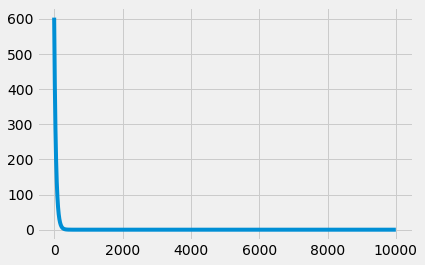

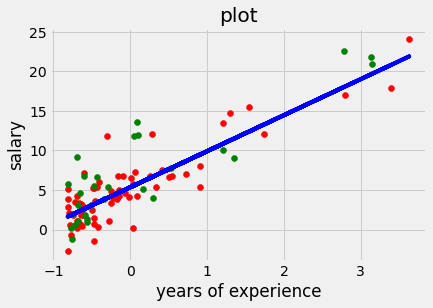

In [23]:

data=pd.read_csv('data.csv')

def data_normalize(data):
        return ((data-data.mean())/data.std()).round(4)

cols = data.shape[1]
X = np.array(data.iloc[:,0:cols-1])
y = np.array(data.iloc[:,cols-1:cols])
X = data_normalize(X)

#spliting training and testing x,y
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
regressor = LinearRegression(x_train,y_train)

iteration = 10000
alpha = 0.01
cost = regressor.fit(iteration,alpha)

rng = np.arange(0,iteration)
plt.plot(rng,cost)
plt.show()

y_pred = regressor.predict(x_train)
plt.style.use('fivethirtyeight')
plt.scatter(x_train,y_train,color = 'red')
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_train,y_pred,color = 'blue')
plt.title('plot')
plt.xlabel('years of experience')
plt.ylabel('salary')

plt.show()

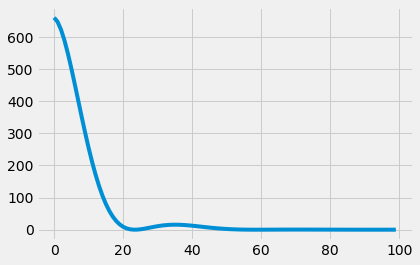

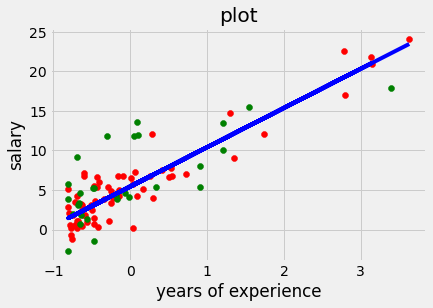

In [24]:

data=pd.read_csv('data.csv')

def data_normalize(data):
        return ((data-data.mean())/data.std()).round(4)

cols = data.shape[1]
X = np.array(data.iloc[:,0:cols-1])
y = np.array(data.iloc[:,cols-1:cols])
X = data_normalize(X)

#spliting training and testing x,y
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
regressor = LinearRegression(x_train,y_train)

iteration = 100
alpha = 0.01
cost = regressor.fit(iteration,alpha,optimizer='momentum')

rng = np.arange(0,iteration)
plt.plot(rng,cost)
plt.show()

y_pred = regressor.predict(x_train)
plt.style.use('fivethirtyeight')
plt.scatter(x_train,y_train,color = 'red')
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_train,y_pred,color = 'blue')
plt.title('plot')
plt.xlabel('years of experience')
plt.ylabel('salary')

plt.show()

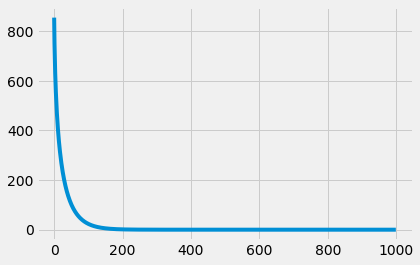

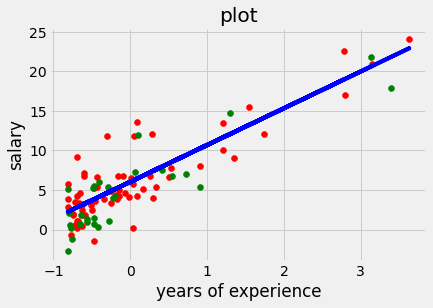

In [25]:

data=pd.read_csv('data.csv')

def data_normalize(data):
        return ((data-data.mean())/data.std()).round(4)

cols = data.shape[1]
X = np.array(data.iloc[:,0:cols-1])
y = np.array(data.iloc[:,cols-1:cols])
X = data_normalize(X)

#spliting training and testing x,y
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
regressor = LinearRegression(x_train,y_train)

iteration = 1000
alpha = 0.01
cost = regressor.fit(iteration,alpha,optimizer='RMSProp')

rng = np.arange(0,iteration)
plt.plot(rng,cost)
plt.show()

y_pred = regressor.predict(x_train)
plt.style.use('fivethirtyeight')
plt.scatter(x_train,y_train,color = 'red')
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_train,y_pred,color = 'blue')
plt.title('plot')
plt.xlabel('years of experience')
plt.ylabel('salary')

plt.show()

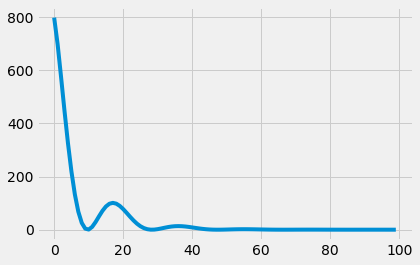

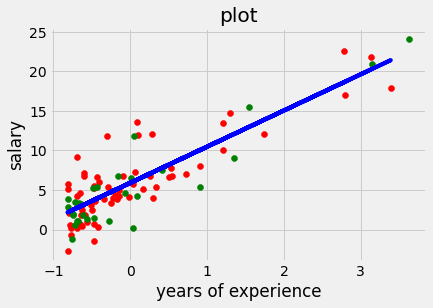

In [26]:

data=pd.read_csv('data.csv')

def data_normalize(data):
        return ((data-data.mean())/data.std()).round(4)

cols = data.shape[1]
X = np.array(data.iloc[:,0:cols-1])
y = np.array(data.iloc[:,cols-1:cols])
X = data_normalize(X)

#spliting training and testing x,y
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
regressor = LinearRegression(x_train,y_train)

iteration = 100
alpha = 0.01
cost = regressor.fit(iteration,alpha,optimizer='adam')

rng = np.arange(0,iteration)
plt.plot(rng,cost)
plt.show()

y_pred = regressor.predict(x_train)
plt.style.use('fivethirtyeight')
plt.scatter(x_train,y_train,color = 'red')
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_train,y_pred,color = 'blue')
plt.title('plot')
plt.xlabel('years of experience')
plt.ylabel('salary')

plt.show()